# Fare exploration 

** IT APPEARS THAT FARE IS SHARED IN CASE OF MULTIPLE PEOPLE EMBARKING ON A SINGLE TICKET !!! **

Let's throw this to the bin and start anew.

We need to see 

 + how fare is correlated with survival
 + how we can forge a new simpler and more relevant Fare feature
 + if there are missing values we might need to complete

## 0 Setup

### 0.1 Loading of data, external libraries and functions.

In [4]:
library(here)
setwd(here())
print(getwd())
source(file="misc_functions.R")
source("experiments/titanic_challenge/1_feature_engineering.R")

library(gridExtra)
library(lattice)

[1] "/home/sapristi/Documents/ML"


### 0.2 Creation of a dataframe with relevant rows, and forged features (age, title)

In [5]:
train.raw <- read.csv("datasets/titanic_na/train.csv")
train.ff <- fe$forge_features(train.raw)

train.raw$Survived <- as.factor(train.raw$Survived)
cols.notna <-  (!is.na(train.raw$Age))
train.notna <- train.raw[cols.notna,]

train.notna$Pclass <- as.factor(train.raw$Pclass[cols.notna])
train.notna$Title <- train.ff$Title[cols.notna]
train.notna$Age <- train.ff$Age[cols.notna]
train.notna$Age.simple <- train.ff$Age.simple[cols.notna]
train.notna$Age.disc5 <- train.ff$Age.disc5[cols.notna]

train.notna$Fare.disc10 <- sapply(train.notna$Fare, function (f) {as.integer(f/10)})
train.notna$Fare.disc10 <- as.factor(train.notna$Fare.disc10)

train.notna$Fare.sqrtdisc <- sapply(train.notna$Fare, function(f) {as.integer(sqrt(f)/3)})
train.notna$Fare.sqrtdisc <- as.factor(train.notna$Fare.sqrtdisc)


## 1 Visualisation

### 1.1 Fare ~ Survived

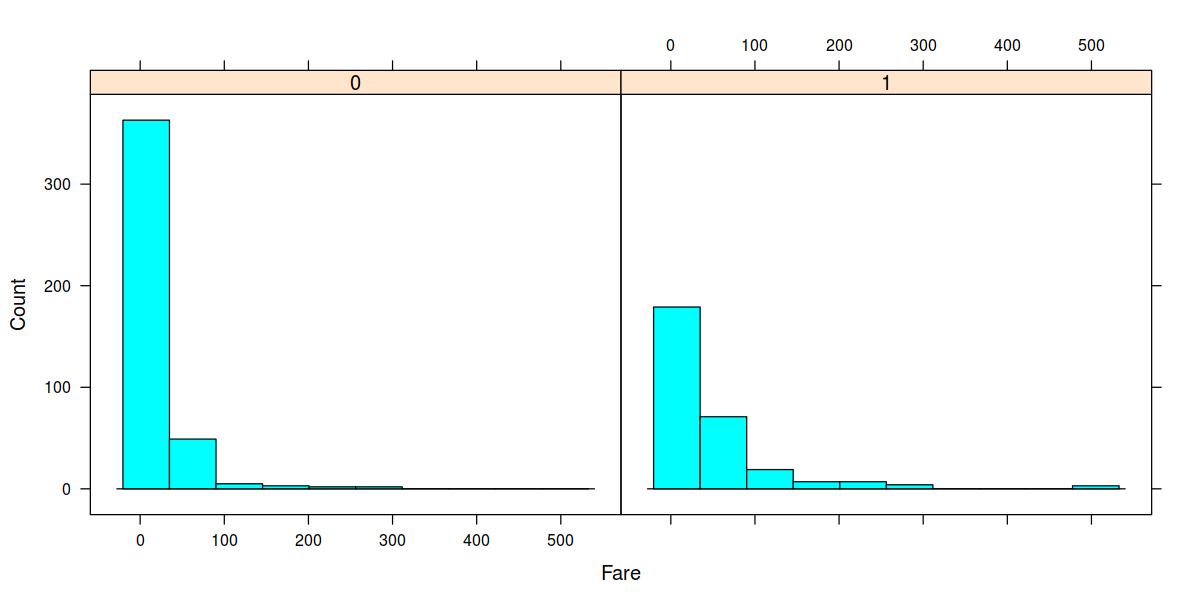

In [39]:
options(repr.plot.height= 5)
histogram(~ Fare | Survived , data = train.notna, type="count")

We can see some difference in surivival between low and high fare, but not very clearly.

### 1.2 Survival | Fare

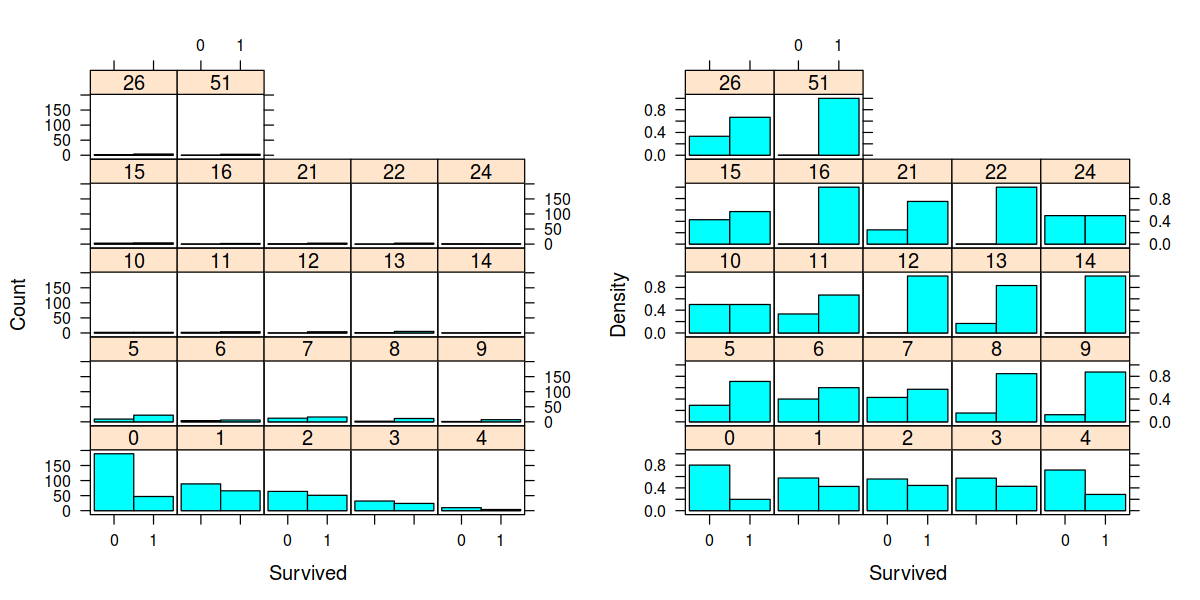

In [6]:
options(repr.plot.height= 5, repr.plot.width=10)
h1 <- histogram( ~ Survived  | Fare.disc10, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
h2 <- histogram( ~ Survived  | Fare.disc10, data = train.notna, type="density")

print(h1, split=c(1,1,2,1), more=TRUE)
print(h2, split=c(2,1,2,1))

### 1.3 Survival | sqrt(Fare) + Title

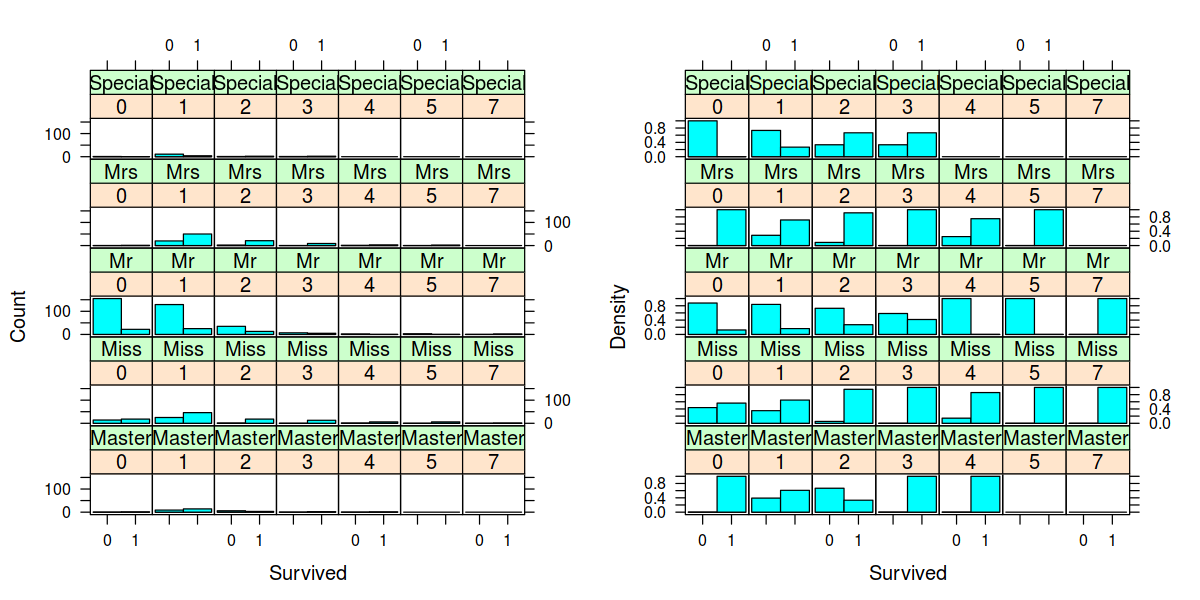

In [7]:
h3 <- histogram( ~ Survived  | Fare.sqrtdisc + Title, data = train.notna, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
h4 <- histogram( ~ Survived  | Fare.sqrtdisc + Title, data = train.notna, type="density")

print(h3, split=c(1,1,2,1), more=TRUE)
print(h4, split=c(2,1,2,1))

### 1.4 Survival | log(Fare) + Title

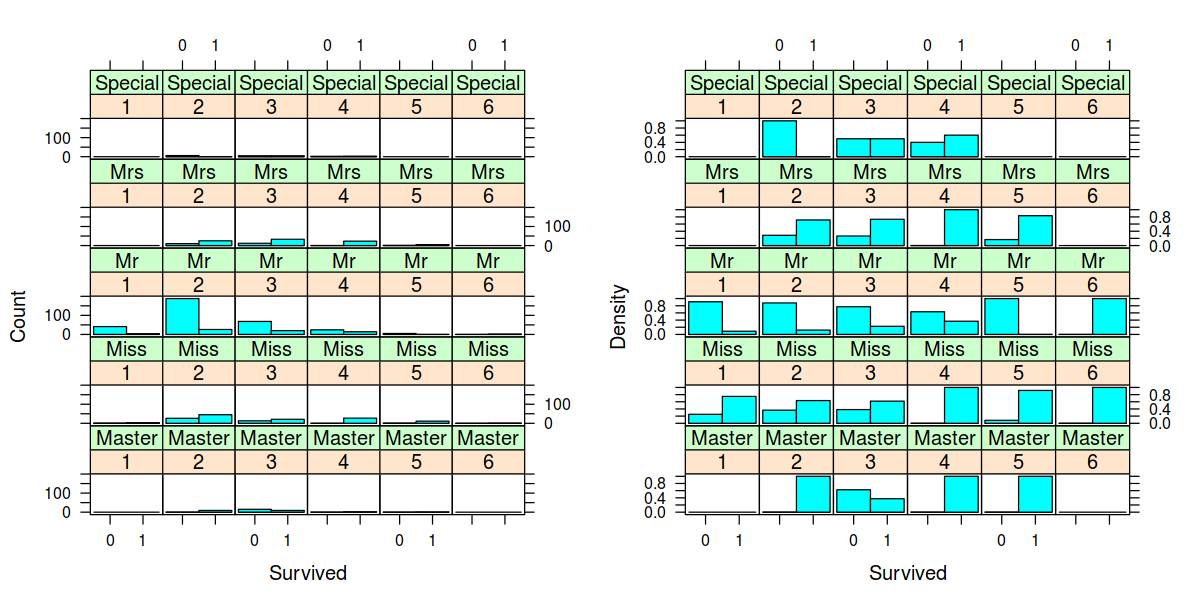

In [13]:
nonzerofare <- train.notna$Fare != 0
train.nonzerofare <- train.notna[nonzerofare, ]

train.nonzerofare$Fare.logdisc <- sapply(train.nonzerofare$Fare, function(f) {floor(log(f))})
train.nonzerofare$Fare.logdisc <- as.factor(train.nonzerofare$Fare.logdisc)

h5 <- histogram( ~ Survived  | Fare.logdisc + Title, data = train.nonzerofare, type="count", 
          lattice.options = list(key = list(cex.title = 50)))
h6 <- histogram( ~ Survived  | Fare.logdisc + Title, data = train.nonzerofare, type="density")

print(h5, split=c(1,1,2,1), more=TRUE)
print(h6, split=c(2,1,2,1))

### 1.5 Comparison of log and sqrt Fare scales for Survival | Fare + Title

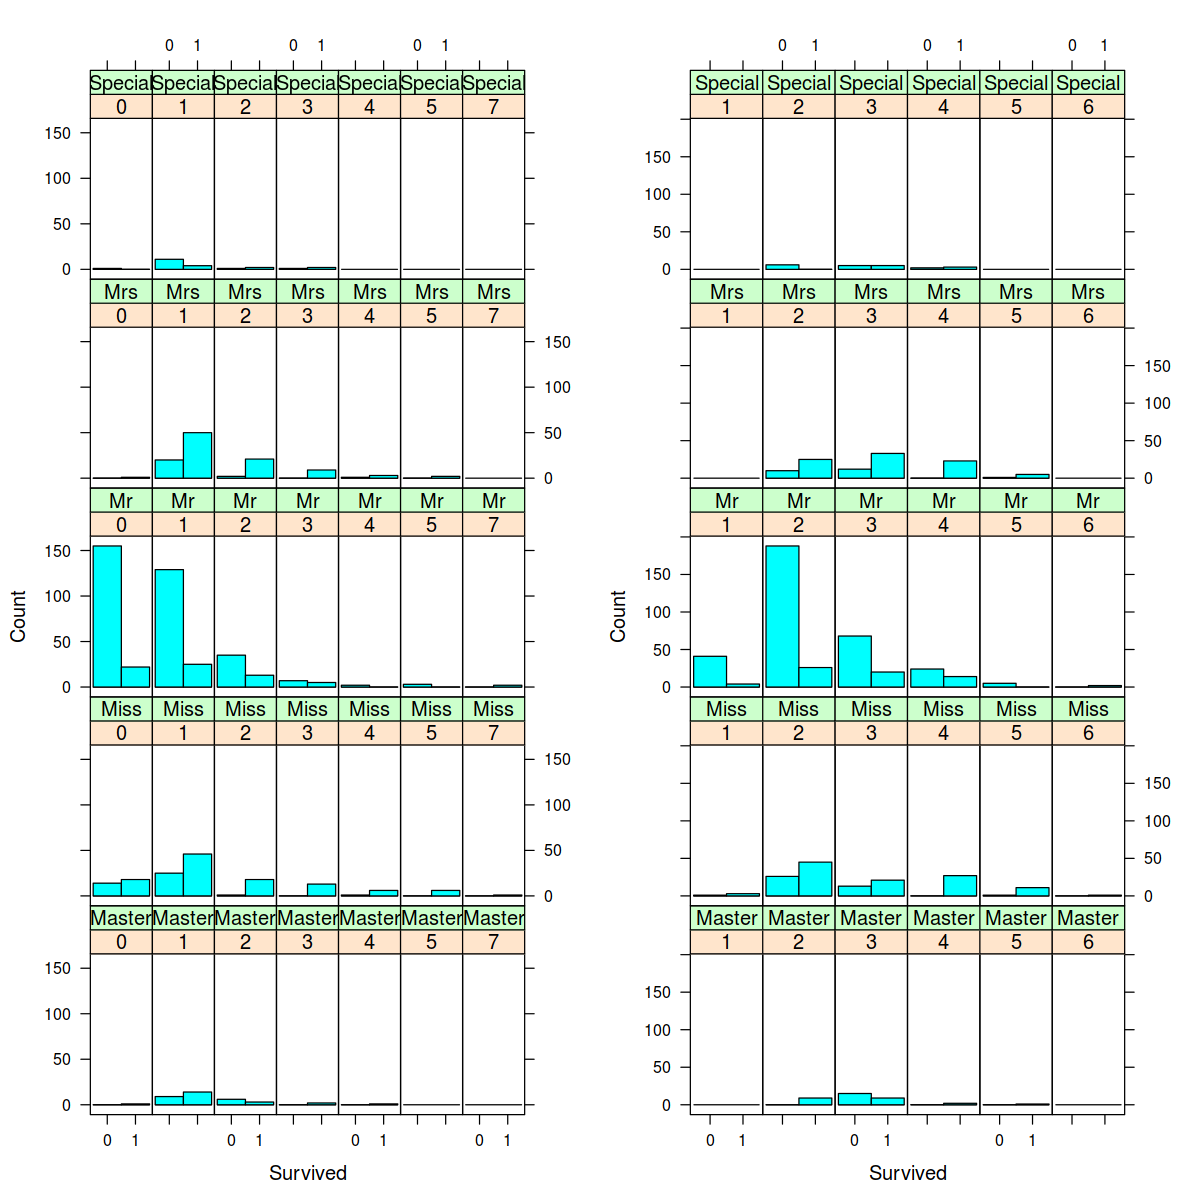

In [14]:
options(repr.plot.height= 10)
        
print(h3, split=c(1,1,2,1), more=TRUE)
print(h5, split=c(2,1,2,1))

## 1.3 Pclass and Fare are obviously related, but how so ?

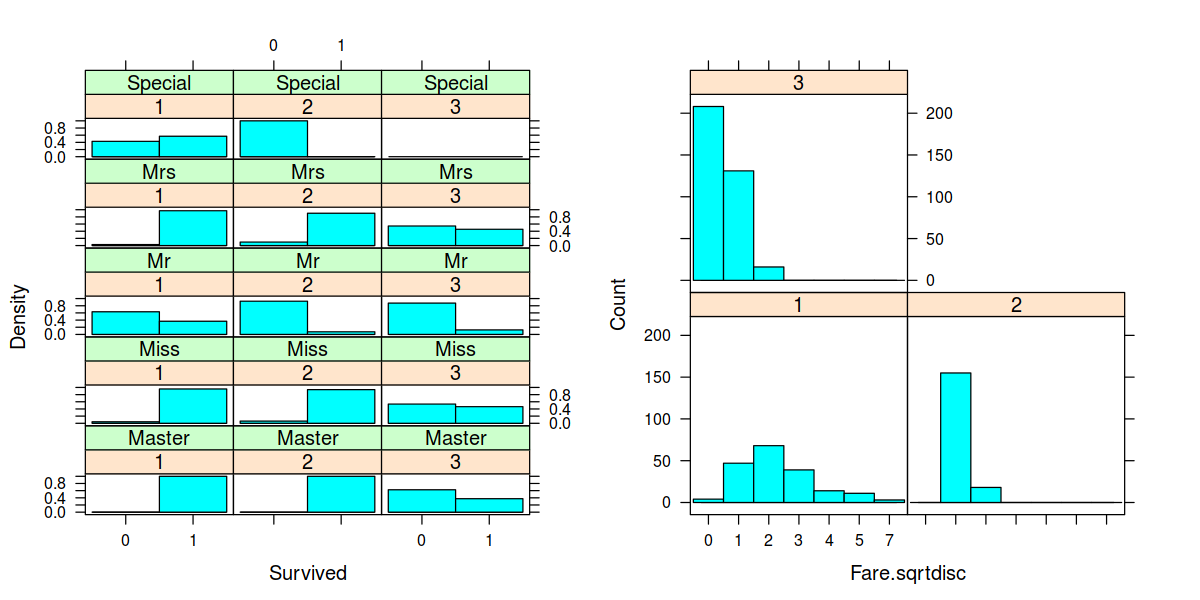

In [27]:
# h1 <- histogram( ~ Survived  | Pclass + Title, data = train.notna, type="density")
h2 <- histogram(~ Fare.sqrtdisc | Pclass, data = train.notna, type="count")

print(h1, split=c(1,1,2,1), more=TRUE)
print(h2, split=c(2,1,2,1))

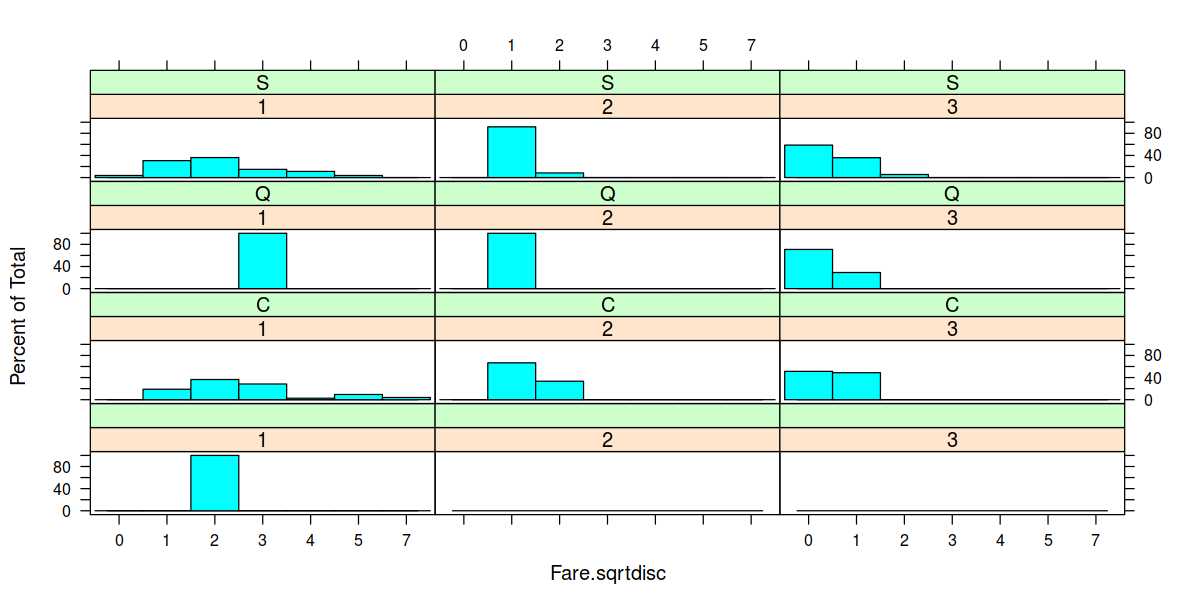

In [31]:
histogram(~ Fare.sqrtdisc | Pclass + Embarked, data = train.notna, type="percent")


## 2 Fare imputation

# Conclusion

 + Putting Fare at a square root scale seems good enough, we could maybe improve the scale a bit (or go to a log scale) but the results will be approximately the same.
 + Fare seems a good indicator 
 + Some fare are equal to 0. It seems that these should actually be NA, so we will need to re